In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import cv2
import imghdr
import os


data_dir = ".spyder-py3/data"

img_extens= ['jpeg','jpg','png','bmp']

database = os.listdir(data_dir)
print(database)

['eleph.jpg', 'Elephant', 'ellee.jpg', 'Lion', 'zebra']


In [14]:
def func():
    for imagesfile in database:
        for images in os.listdir(os.path.join(data_dir, imagesfile)): 
            image_path =os.path.join(data_dir, imagesfile, images)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                
                if tip not in img_extens:
                #  print(image_path)
                  os.remove(image_path)
                 
                
            
            except Exception as e:
                print("Wrongfromat")
func()

In [15]:
image_size = (360, 360)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 1151 files belonging to 3 classes.
Using 921 files for training.
Using 230 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['Elephant', 'Lion', 'zebra']


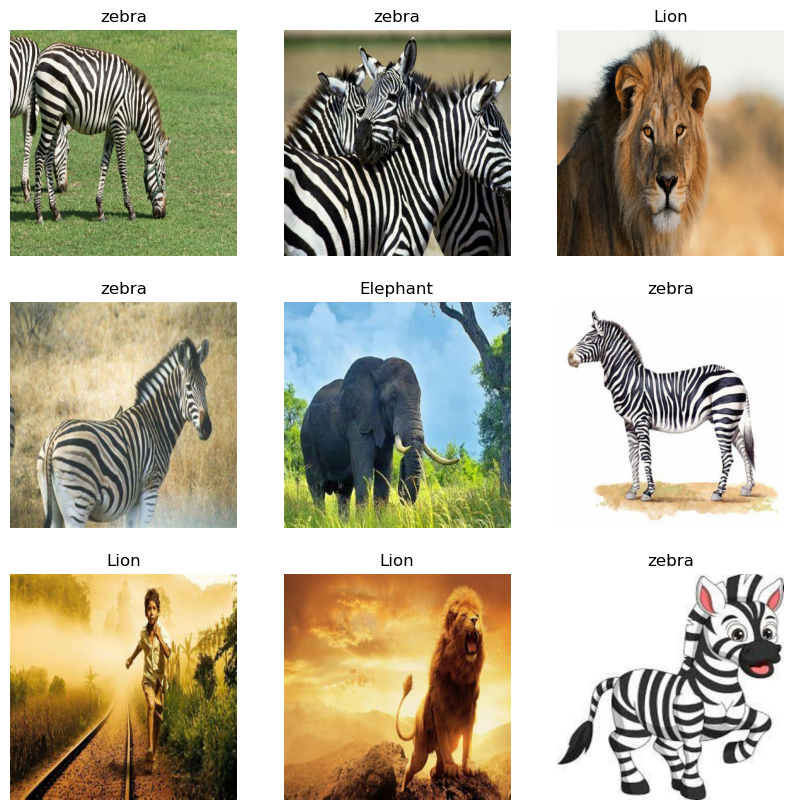

In [17]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
model = Sequential([

 
  layers.Conv2D(32, (3,3), 2, activation='relu',  input_shape=(image_size[0], image_size[0], 3) ),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 2, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), 2, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3)
])


In [19]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
model.fit(
    train_ds,
    epochs=epochs,
      callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
8/8 [==============================] - 22s 2s/step - loss: 26.1839 - accuracy: 0.4408 - val_loss: 3.8335 - val_accuracy: 0.4348
Epoch 2/25
8/8 [==============================] - 21s 2s/step - loss: 2.2897 - accuracy: 0.5396 - val_loss: 1.0969 - val_accuracy: 0.6304
Epoch 3/25
8/8 [==============================] - 22s 2s/step - loss: 0.7875 - accuracy: 0.7253 - val_loss: 0.9663 - val_accuracy: 0.6609
Epoch 4/25
8/8 [==============================] - 21s 2s/step - loss: 0.5511 - accuracy: 0.7872 - val_loss: 0.7513 - val_accuracy: 0.7130
Epoch 5/25
8/8 [==============================] - 21s 2s/step - loss: 0.4400 - accuracy: 0.8393 - val_loss: 0.7779 - val_accuracy: 0.7348
Epoch 6/25
8/8 [==============================] - 24s 2s/step - loss: 0.3724 - accuracy: 0.8480 - val_loss: 0.7805 - val_accuracy: 0.7478
Epoch 7/25
8/8 [==============================] - 24s 2s/step - loss: 0.2937 - accuracy: 0.8871 - val_loss: 0.7656 - val_accuracy: 0.7609
Epoch 8/25
8/8 [=================

In [34]:
img = keras.preprocessing.image.load_img(
    ".spyder-py3/data/eleph.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
score = (predictions[0])
#print(score)
#print(f"This image is {100 * (1 - score):.2f}% Lion and {100 * score:.2f}% Zebra.")

1/1 [==============================] - 0s 24ms/step
[[-0.77113163 -2.1615965  -5.9215937 ]]


In [35]:

scors = max(score)
index = 0;

for i in score:
    if i != scors:
        index = index+1;
      
    else:
        break;
        
        
print(index)

0


Text(0.5, 1.0, 'Elephant')

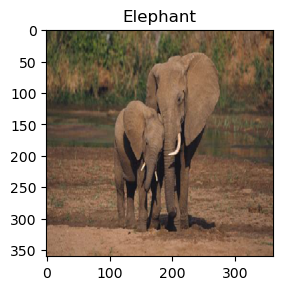

In [36]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3,  5)
plt.imshow(img)
plt.title(class_names[index])


In [37]:
model.save("mycnnmodel.h5", include_optimizer=True)

In [38]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import imghdr
import os

modelmine = keras.models.load_model(".spyder-py3/mycnnmodel.h5")

In [40]:
img = keras.preprocessing.image.load_img(
    ".spyder-py3/data/ellee.jpg", target_size=(360,360)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = modelmine.predict(img_array)
print(predictions)
score = (predictions[0])

1/1 [==============================] - 0s 72ms/step
[[ 3.190668  -4.1815176  0.5335471]]


> s
0


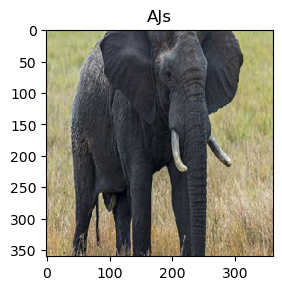

KeyboardInterrupt: Interrupted by user

In [41]:

scors = max(score)
index = 0;

for i in score:
    if i != scors:
        index = index+1;
      
    else:
        break;
        
        
print(index)

plt.figure(figsize=(10, 10))

ax = plt.subplot(3, 3,  5)
plt.imshow(img)
plt.title(class_names[index])
